In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

import datetime as dt

import time

In [3]:
path = r'C:\Users\benre\Documents\astros Batting stats_files\astros_bangs_20200127.xlsx'

In [4]:
# Import sign stealing data as astro
pd.set_option('display.max_columns', None)
astro = pd.read_excel(path)
astro.tail(5)

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id
8269,8270,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,C,Called Strike,f,f,f,14176,https://www.youtube.com/watch?v=oIChAX54tS4&t=...,2017-09-24 22:56:22-05,170925035627,694,3fb6c165-a172-441f-811c-e6f69b87d184,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117
8270,8271,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,C,Called Strike,f,f,f,14200,https://www.youtube.com/watch?v=oIChAX54tS4&t=...,2017-09-24 22:56:46-05,170925035651,695,b5be7076-a036-4b98-a988-d644da58f175,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117
8271,8272,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,B,Ball,f,f,f,14229,https://www.youtube.com/watch?v=oIChAX54tS4&t=...,2017-09-24 22:57:15-05,170925035720,696,861ed82a-579c-4860-addf-3eb43db80bf3,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117
8272,8273,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FS,FB,n,NaN,B,Ball,f,f,f,14265,https://www.youtube.com/watch?v=oIChAX54tS4&t=...,2017-09-24 22:57:51-05,170925035756,697,fab219e6-64db-4ae8-8e0b-4e040a72dc29,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117
8273,8274,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,S,Swinging Strike,f,f,f,14303,https://www.youtube.com/watch?v=oIChAX54tS4&t=...,2017-09-24 22:58:29-05,170925035834,698,121bea48-7a5d-44e5-b71a-0f16033fc71a,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117


In [5]:
astro.drop(['pitch_youtube_seconds','youtube_url','pitch_playid'], axis=1,inplace=True)


Exporitory Analysis

In [6]:
# Identifying  pitch types.
astro[astro['has_bangs'] == 'y']['pitch_category'].unique()

array(['BR', 'FB', 'CH'], dtype=object)

In [7]:
# pitch type counts
astro[astro['has_bangs'] == 'y']['pitch_category'].value_counts()

BR    702
FB    233
CH    207
Name: pitch_category, dtype: int64

In [8]:
# Total number of bangs
sum(astro[astro['has_bangs'] == 'y']['pitch_category'].value_counts())

1142

In [9]:
# Creating a new dataframe by filtering astro dataframe to just yes bang pitches and counting by batter

bb = astro[astro['has_bangs'] == 'y']['batter'].value_counts()
bb = pd.DataFrame(data=bb)
bb= bb.reset_index()
bb.columns = ['Batters','Count']
bb

,Batters,Count
0,Marwin Gonzalez,147
1,George Springer,139
2,Carlos Beltran,138
3,Alex Bregman,133
4,Yuli Gurriel,120
5,Carlos Correa,97
6,Jake Marisnick,83
7,Evan Gattis,71
8,Brian McCann,45
9,Josh Reddick,28


<AxesSubplot:xlabel='Batters', ylabel='Count'>

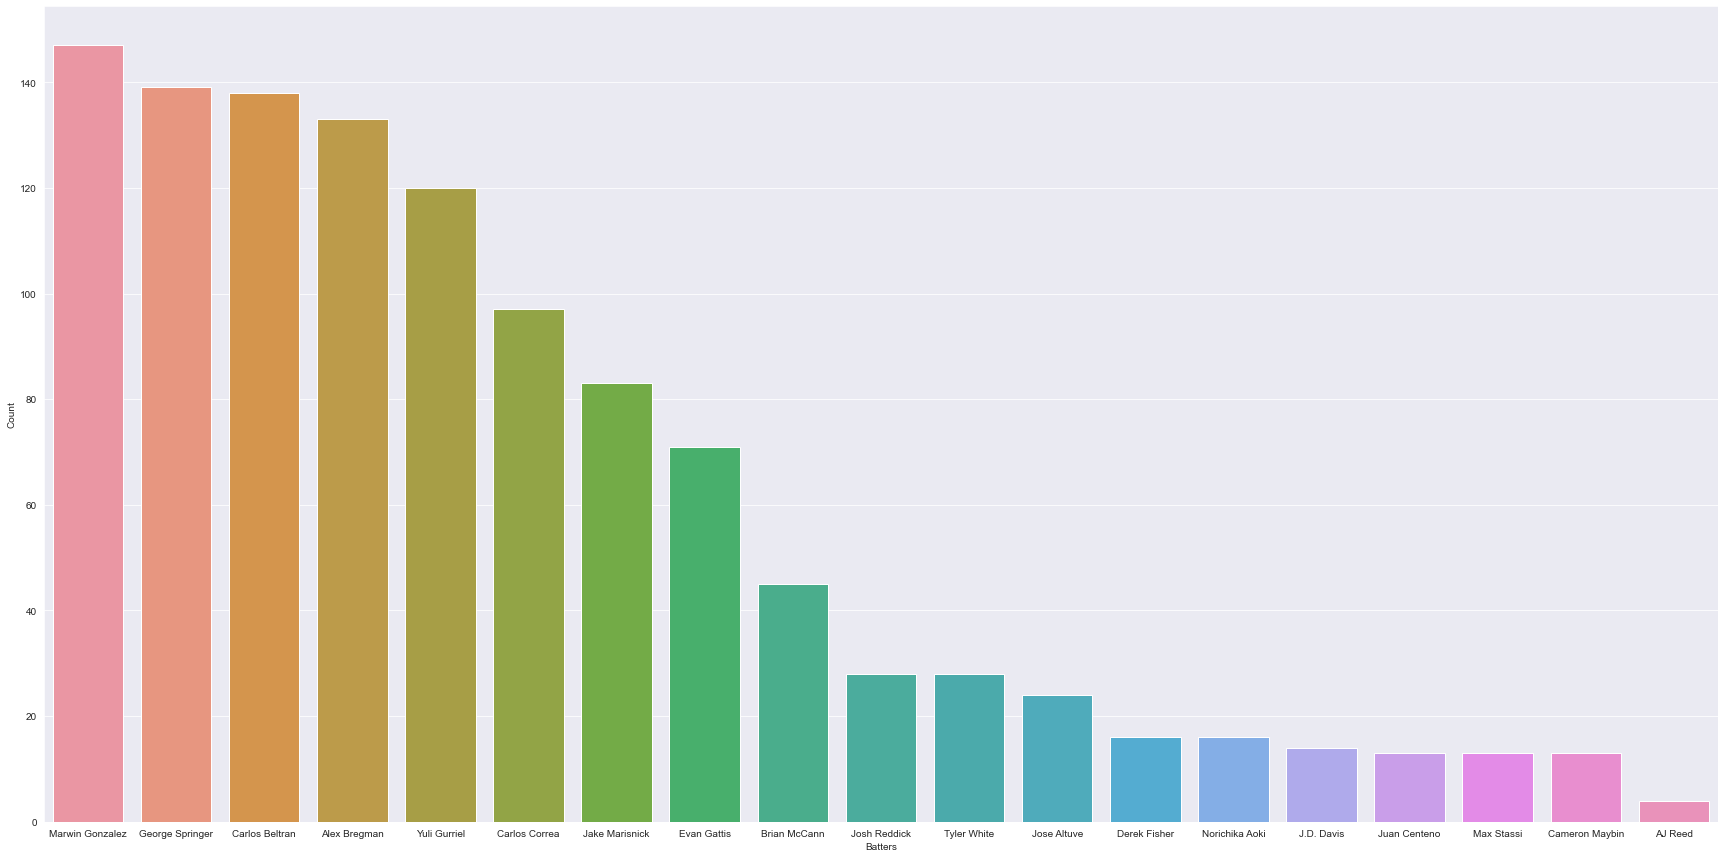

In [10]:
# Plot showing who used the banging scheme the most.
plt.figure(figsize=(30,15))
sns.set_style('darkgrid')
sns.barplot(data=bb, x='Batters', y='Count')

In [11]:
# Bang Count by inning
innings = astro.groupby(['inning','has_bangs'])['has_bangs'].count()
innings = pd.DataFrame(data=innings)
innings = innings.rename(columns={'has_bangs':'count'})
innings = innings.reset_index()

innings

,inning,has_bangs,count
0,1,n,923
1,1,y,87
2,2,n,805
3,2,y,150
4,3,n,883
5,3,y,144
6,4,n,797
7,4,y,163
8,5,n,757
9,5,y,128


In [1]:
# plot showing the usage of bang scheme over innings
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')
innings_fig = sns.lineplot(data= innings,x='inning', y= 'count', hue='has_bangs')
innings_fig.axes.set_title('Offspeed Pitch At-Bat Outcomes',fontsize=20)
innings_fig.set_ylabel(' Count',fontsize=15)
innings_fig.set_xlabel('Inning',fontsize=15)
innings_fig.tick_params(labelsize=12, rotation=0 )

NameError: name 'plt' is not defined

Dataframe of Bangs by pitch

In [48]:
# FB is considered an error give the system was supposed to bang only on BR, and CH. 
BR_n = astro[(astro['has_bangs'] == 'n') &(astro['pitch_category'] == 'BR')]['pitch_category'].count()
FB_n = astro[(astro['has_bangs'] == 'n') &(astro['pitch_category'] == 'FB')]['pitch_category'].count()
CH_n = astro[(astro['has_bangs'] == 'n') &(astro['pitch_category'] == 'CH')]['pitch_category'].count()


FB_y = astro[(astro['has_bangs'] == 'y') & (astro['pitch_category'] == 'FB')]['has_bangs'].count()
BR_y = astro[(astro['has_bangs'] == 'y') & (astro['pitch_category'] == 'BR')]['has_bangs'].count()
CH_y = astro[(astro['has_bangs'] == 'y') & (astro['pitch_category'] == 'CH')]['has_bangs'].count()

bdata = {'pitch type': ['BR','FB','CH'], 'no bang': [BR_n,FB_n,CH_n], 'yes bang': [BR_y,FB_y,CH_y] }
bang = pd.DataFrame(data= bdata)
bang['pitch_total'] = bang['no bang'] + bang['yes bang']
bang['percent_total_n'] = (bang['no bang']/bang['pitch_total']*100).round(3)
bang['percent_total_y'] = (bang['yes bang']/bang['pitch_total']*100).round(3)
bang

,pitch type,no bang,yes bang,pitch_total,percent_total_n,percent_total_y
0,BR,1816,702,2518,72.121,27.879
1,FB,4726,233,4959,95.301,4.699
2,CH,565,207,772,73.187,26.813


Approximation error

**To determine how effective the astros were at properly decoding and relaying signs to hitters we will cross-reference bangs outcomes with the pitch category to see if they correctly banged on Breaking ball and change up pitches while not banging on fastball pitches.
The data in the above table named bang, allows us to complete this process.

Error Approximation Formula
 
 S = ((Va - Ve)/Ve)*100

In [14]:

#Va = Actual Value Observed
#Ve = Expected Value
#S = Percent Error

In [15]:
def error(Va,Ve):
    return (-(Va-Ve)/Ve)*100



In [49]:
br_error = error(4959,4726)
# If we consider all Breaking ball and Changeup pitches that their was no bang a unexpected outcome. In ideal terms were assuming the Astros would decode and signal Breaking ball and change up pitches on every pitch, if they could.
# Any bang heard on a fastball is a error given we know banging was only used to signal offspeed pitches.

print(f'Percent error of Breaking ball pitches: {error(702,2518)}') 
print(f'Percent error of Fastball pitches: {error(4959,4726)}') 
print(f'Percent error of Changeup pitches: {error(207,772)}')

Percent error of Breaking ball pitches: 72.12073073868149
Percent error of Fastball pitches: -4.930173508252222
Percent error of Changeup pitches: 73.18652849740933


In [17]:
# BR (Breaking Ball), and CH (Changeup) are considered Offspeed
# Mapping pitch category to offspeed. 1= Offspeed, 0 = Fastball
offmap = {'FB':0,'BR':1,'CH':1} 
astro['offspeed'] = astro['pitch_category'].map(offmap)



Analyzing the data by month

In [18]:
# Creating a new column identifying  the month of each pitch
astro['game_date'] = pd.to_datetime(astro['game_date'])
astro['Month'] = astro['game_date'].apply( lambda time: time.month)
astro.tail(5)

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_datetime,game_pitch_id,event_number,atbat_playid,away_team_id,home_team_id,offspeed,Month
8269,8270,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,C,Called Strike,f,f,f,2017-09-24 22:56:22-05,170925035627,694,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117,0.0,9
8270,8271,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,C,Called Strike,f,f,f,2017-09-24 22:56:46-05,170925035651,695,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117,0.0,9
8271,8272,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,B,Ball,f,f,f,2017-09-24 22:57:15-05,170925035720,696,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117,0.0,9
8272,8273,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FS,FB,n,NaN,B,Ball,f,f,f,2017-09-24 22:57:51-05,170925035756,697,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117,0.0,9
8273,8274,2017_09_24_anamlb_houmlb_1,492424,2017-09-24,ANA,7,5,9,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,S,Swinging Strike,f,f,f,2017-09-24 22:58:29-05,170925035834,698,121bea48-7a5d-44e5-b71a-0f16033fc71a,108,117,0.0,9


In [19]:
# Mapping month number to name
astro['Month'].value_counts()
month = {4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept'}
astro['Month'] = astro['Month'].map(month)

month_count= astro['Month'].value_counts()
month_count


Aug      1728
April    1639
May      1572
Jun      1303
Jul      1084
Sept      948
Name: Month, dtype: int64

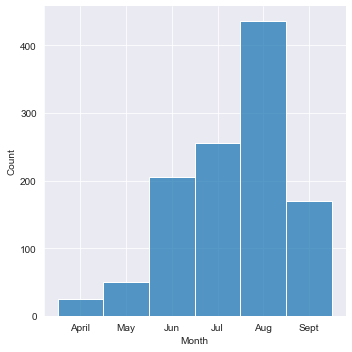

In [53]:
# plotting bangs by month
X = astro[astro['has_bangs'] == 'y']['Month']
sns.displot(data=astro, x= X)

Error for August

** Same error calculation as above. However, August has the highest concentration of bangs unlike other months. Indicating a peak at which they were actively using the scheme. Looking at just August can give us a better idea on how effective they were at decoding and relaying sign. While other months could have skewed results due to inactivity of scheme usage.

In [54]:

aug = astro[astro['Month'] == 'Aug']

aug_BR_n = aug[(aug['has_bangs'] == 'n') &(aug['pitch_category'] == 'BR')]['pitch_category'].count()
aug_FB_n = aug[(aug['has_bangs'] == 'n') &(aug['pitch_category'] == 'FB')]['pitch_category'].count()
aug_CH_n = aug[(aug['has_bangs'] == 'n') &(aug['pitch_category'] == 'CH')]['pitch_category'].count()


aug_FB_y = aug[(aug['has_bangs'] == 'y') & (aug['pitch_category'] == 'FB')]['has_bangs'].count()
aug_BR_y = aug[(aug['has_bangs'] == 'y') & (aug['pitch_category'] == 'BR')]['has_bangs'].count()
aug_CH_y = aug[(aug['has_bangs'] == 'y') & (aug['pitch_category'] == 'CH')]['has_bangs'].count()

augdata = {'pitch type': ['BR','FB','CH'], 'no bang': [aug_BR_n,aug_FB_n,aug_CH_n], 'yes bang': [aug_BR_y,aug_FB_y,aug_CH_y] }
augbang = pd.DataFrame(data= augdata)
augbang['pitch_total'] = augbang['no bang'] + augbang['yes bang']
augbang['percent_total_n'] = (augbang['no bang']/augbang['pitch_total']*100).round(3)
augbang['percent_total_y'] = (augbang['yes bang']/augbang['pitch_total']*100).round(3)
augbang

,pitch type,no bang,yes bang,pitch_total,percent_total_n,percent_total_y
0,BR,254,254,508,50.000,50.000
1,FB,945,73,1018,92.829,7.171
2,CH,92,109,201,45.771,54.229


SO/Walks

**The astros K% and BB% dropped significantly from 2016 to 2017. In this section will look at if the astros stealing signs had a effect on there K% and BB% rates.

In [23]:
# First create a dataframe filtering down the out come of the Plate Apearence to Walks and Strikeouts.
so_w = astro[(astro['at_bat_event'] == 'Walk') | (astro['at_bat_event'] == 'Strikeout' )]
so_w.head()

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_datetime,game_pitch_id,event_number,atbat_playid,away_team_id,home_team_id,offspeed,Month
5,6,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,SI,FB,n,NaN,B,Ball,t,f,f,2017-04-03 19:27:22-05,170404002722,44,0813793b-63a1-4179-b681-675180afe82d,136,117,0.0,April
6,7,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,SL,BR,y,1B,C,Called Strike,t,f,f,2017-04-03 19:27:46-05,170404002747,45,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April
7,8,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,F,Foul,t,f,f,2017-04-03 19:28:16-05,170404002817,47,0813793b-63a1-4179-b681-675180afe82d,136,117,0.0,April
8,9,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,CH,CH,n,NaN,B,Ball,t,f,f,2017-04-03 19:28:45-05,170404002846,48,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April
9,10,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,CH,CH,n,NaN,B,Ball,t,f,f,2017-04-03 19:29:11-05,170404002912,49,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April


In [24]:
# Unique detailed descriptions of strikeouts and Walks
so_w['description'].value_counts()

Ball                         1154
Called Strike                 551
Foul                          544
Swinging Strike               393
Ball In Dirt                   91
Swinging Strike (Blocked)      61
Foul Tip                       35
Foul (Runner Going)             6
Missed Bunt                     1
Foul Bunt                       1
Name: description, dtype: int64

In [27]:
#creating a data frame only showing the month of August games, showing the highest frequency of bang pitches.
so_w_aug = so_w[so_w['Month'] == 'Aug']
so_w_aug['at_bat_event'].value_counts()

Strikeout    391
Walk         185
Name: at_bat_event, dtype: int64

In [42]:
# Catagorizing descriptions of pitch outcomes in a new column
# F = Foul
# B = Ball
# S = Strike
so = {'Ball':'B','Called Strike': 'S','Foul': 'F', 'Swinging Strike': 'S','Ball In Dirt':'B', 'Foul Tip':'F','Swinging Strike (Blocked)':'S','Foul (Runner Going)': 'F', 'Foul Bunt': 'F', 'Missed Bunt': 'S'}
so_w['Call'] = so_w['description'].map(so)
so_w.head()

C:\Users\benre\AppData\Local\Temp\ipykernel_13392\2570835012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_w['Call'] = so_w['description'].map(so)


,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_datetime,game_pitch_id,event_number,atbat_playid,away_team_id,home_team_id,offspeed,Month,Call
5,6,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,SI,FB,n,NaN,B,Ball,t,f,f,2017-04-03 19:27:22-05,170404002722,44,0813793b-63a1-4179-b681-675180afe82d,136,117,0.0,April,B
6,7,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,SL,BR,y,1B,C,Called Strike,t,f,f,2017-04-03 19:27:46-05,170404002747,45,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April,S
7,8,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,FF,FB,n,NaN,F,Foul,t,f,f,2017-04-03 19:28:16-05,170404002817,47,0813793b-63a1-4179-b681-675180afe82d,136,117,0.0,April,F
8,9,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,CH,CH,n,NaN,B,Ball,t,f,f,2017-04-03 19:28:45-05,170404002846,48,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April,B
9,10,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,CH,CH,n,NaN,B,Ball,t,f,f,2017-04-03 19:29:11-05,170404002912,49,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April,B


In [29]:
# Grouping by at bat event description, adn offspeed and counting the number of yes and no bang pitches 
so_w_event = so_w.groupby(['at_bat_event','description','has_bangs','offspeed'])['description'].count()
so_w_event = pd.DataFrame(data=so_w_event)
so_w_event = so_w_event.rename(columns={'description':'count'})
so_w_event = so_w_event.reset_index()

so_w_event

,at_bat_event,description,has_bangs,offspeed,count
0,Strikeout,Ball,n,0.0,294
1,Strikeout,Ball,n,1.0,171
2,Strikeout,Ball,y,0.0,8
3,Strikeout,Ball,y,1.0,56
4,Strikeout,Ball In Dirt,n,0.0,3
5,Strikeout,Ball In Dirt,n,1.0,27
6,Strikeout,Ball In Dirt,y,1.0,12
7,Strikeout,Called Strike,n,0.0,245
8,Strikeout,Called Strike,n,1.0,144
9,Strikeout,Called Strike,y,0.0,8


In [30]:
# create a column that classifies the description as a ball or strike then group by Ball/Strike/Foul
# Also create a numbering system for each pitch outcome "description"

In [31]:

#Call outcomes
bs = so_w.groupby(['at_bat_event','Call','has_bangs'])['Call'].count()
b_s_event = pd.DataFrame(data=bs)
b_s_event = b_s_event.rename(columns={'Call':'count'})
b_s_event = b_s_event.reset_index()
b_s_event

,at_bat_event,Call,has_bangs,count
0,Strikeout,B,n,497
1,Strikeout,B,y,76
2,Strikeout,F,n,367
3,Strikeout,F,y,54
4,Strikeout,S,n,759
5,Strikeout,S,y,98
6,Walk,B,n,574
7,Walk,B,y,98
8,Walk,F,n,156
9,Walk,F,y,9


In [32]:
 # Filtering down to the last pitch of the at bat, the deciding pitch that determines the at bat event. In order to prevent duplicate at bat events
 so_w_ab = so_w.groupby('atbat_playid').tail(1)
 so_w_ab.head()

,Line ID,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,pitch_datetime,game_pitch_id,event_number,atbat_playid,away_team_id,home_team_id,offspeed,Month,Call
10,11,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,1,bottom,Jose Altuve,Strikeout,SL,BR,n,NaN,S,Swinging Strike,t,f,f,2017-04-03 19:29:38-05,170404002938,50,0813793b-63a1-4179-b681-675180afe82d,136,117,1.0,April,S
17,18,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,2,bottom,Carlos Beltran,Strikeout,FF,FB,n,NaN,C,Called Strike,f,f,f,2017-04-03 19:39:50-05,170404003950,85,164cb4d8-c519-4261-85a7-bba6bff79128,136,117,0.0,April,S
32,33,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,3,bottom,Brian McCann,Strikeout,FF,FB,n,NaN,S,Swinging Strike,f,f,f,2017-04-03 19:53:01-05,170404005301,128,afa70c64-5356-45a6-b775-390765ec26a6,136,117,0.0,April,S
44,45,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,3,bottom,Jose Altuve,Strikeout,SL,BR,n,NaN,W,Swinging Strike (Blocked),t,f,t,2017-04-03 20:01:00-05,170404010101,157,dff76d36-4e33-4e4f-bdad-4c9dcab56c3d,136,117,1.0,April,S
50,51,2017_04_03_seamlb_houmlb_1,490111,2017-04-03,SEA,0,3,4,bottom,Carlos Beltran,Strikeout,CU,BR,n,NaN,W,Swinging Strike (Blocked),f,f,f,2017-04-03 20:20:32-05,170404012032,222,b23c9ab9-5482-433a-93a7-0b1f609f2bf2,136,117,1.0,April,S


In [33]:
# number of strikeouts compared to walks
so_w_ab['at_bat_event'].value_counts()

Strikeout    368
Walk         168
Name: at_bat_event, dtype: int64

Text(0.5, 1.0, 'Comparison of Strikeouts to Walks over 58 games')

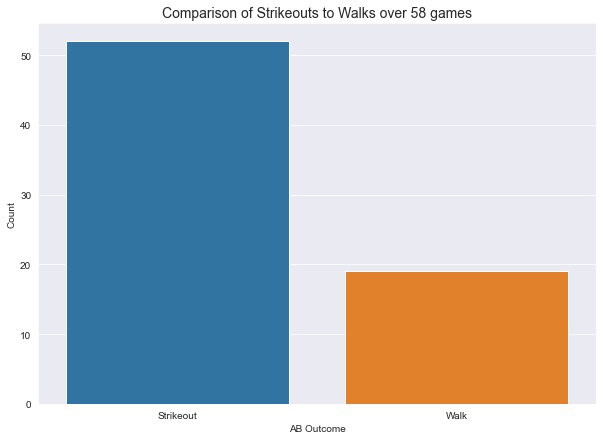

In [35]:
# comparison plot of the above
sowab1 = {'AB Outcome':['Strikeout','Walk'], 'Count': [52,19]}
sowab1 = pd.DataFrame(data=sowab1)

plt.figure(figsize=(10,7))
sowab_fig = sns.barplot(data=sowab1, x= 'AB Outcome', y='Count')
sowab_fig.axes.set_title('Comparison of Strikeouts to Walks over 58 games',fontsize=14)

In [36]:
# drilling down to just pitch determining at bats where a bang was heard
so_w_ab[so_w_ab['has_bangs'] == 'y']['at_bat_event'].value_counts()

Strikeout    52
Walk         19
Name: at_bat_event, dtype: int64

In [37]:
print(f'Percentage strikeouts: {(52/71)*100} %')
print(f'Percentage walks: {(19/71)*100} %')


Percentage strikeouts: 73.23943661971832 %
Percentage walks: 26.76056338028169 %


Text(0.5, 1.0, 'Comparison of Strikeouts to Walks on Bang PA')

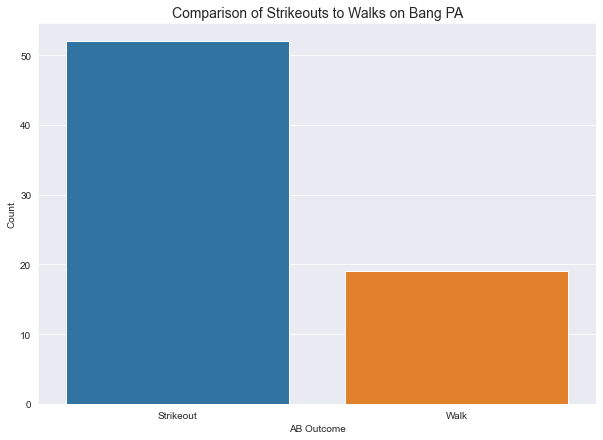

In [38]:
#another comparison plot showing outcomes where bangs were heard on determining pitch.
sowab = {'AB Outcome':['Strikeout','Walk'], 'Count': [52,19]}
sowab = pd.DataFrame(data=sowab)

plt.figure(figsize=(10,7))
sowab_fig = sns.barplot(data=sowab, x= 'AB Outcome', y='Count')
sowab_fig.axes.set_title('Comparison of Strikeouts to Walks on Bang PA',fontsize=14)



In [40]:
# creating a data frame called bs_month to show the amount of strikeouts and walks of the length of the season
#bs_month is further catagorized by yes or no bang pitch determining at bats.

bs_month = so_w_ab.groupby(['at_bat_event','Month','has_bangs'])['Month'].count()
bs_month = pd.DataFrame(data=bs_month)
bs_month = bs_month.rename(columns={'Month':'count'})
bs_month = bs_month.reset_index()
months = {'April':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sept':9}
bs_month['month date'] = bs_month['Month'].map(months)
bs_month.sort_values(by=['month date'], ascending=True, inplace=True)

Text(0.5, 1.0, 'Comparing Strikeout/Walks over the Season')

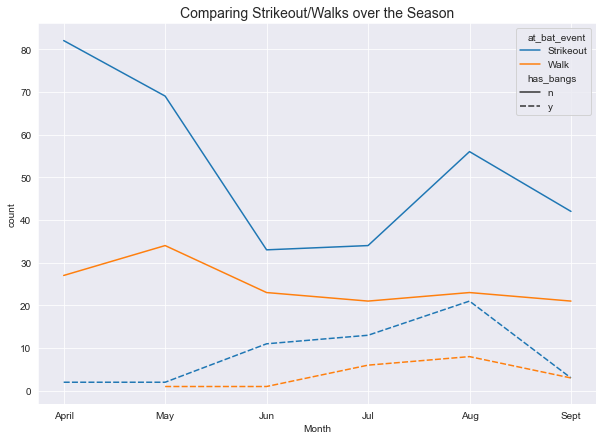

In [41]:
# Plot showing the amount of strikeouts and walks from April to Sept
# Amount of bang determing at bats is included.

plt.figure(figsize=(10,7))
bs_fig= sns.lineplot(data= bs_month, x='Month', y='count', hue='at_bat_event', style='has_bangs')
bs_fig.axes.set_title('Comparing Strikeout/Walks over the Season',fontsize=14)